# Bank Nifty Option Price predection

Here we will predict the opening price of Bank Nifty derivative based on some feature.

Data From 25-Feb-2019 From 23_feb-2021 (24 Months data, COllected from NSE Website)

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
data=pd.read_csv('Option_Price_NSE.csv')
data.shape
#45012 Rows and 10 Columns

(45012, 10)

In [54]:
data.head()

,Symbol,Date,Expiry,Option Type,Strike Price,Open,Prev_BN_CP,BankNifty_OP,Change_In_BN,Prev_Close
0,BANKNIFTY,6-Mar-19,7-Mar-19,CE,26400,1177.35,27554.05,27618.1,64.05,1125.00
1,BANKNIFTY,6-Mar-19,7-Mar-19,CE,27300,329.60,27554.05,27618.1,64.05,291.95
2,BANKNIFTY,6-Mar-19,7-Mar-19,CE,27400,234.90,27554.05,27618.1,64.05,212.85
3,BANKNIFTY,6-Mar-19,7-Mar-19,CE,27500,164.00,27554.05,27618.1,64.05,146.50
4,BANKNIFTY,6-Mar-19,7-Mar-19,CE,27600,123.80,27554.05,27618.1,64.05,93.85


In [55]:
data.drop('Symbol',axis=1,inplace=True)
# Not required it is just an symbol of banknifty derivative

# Step 1-- Exploratory Data Analysis

In Explorator Data Analysis, we will analys data and see the relationships between features.

In [56]:
data.isnull().sum()
# There is no null value present in the dataset

Date            0
Expiry          0
Option Type     0
Strike Price    0
Open            0
Prev_BN_CP      0
BankNifty_OP    0
Change_In_BN    0
Prev_Close      0
dtype: int64

In [57]:
df=data.copy()
# Creating copy of dataframe to protect actual data.

In [58]:
df.head()

,Date,Expiry,Option Type,Strike Price,Open,Prev_BN_CP,BankNifty_OP,Change_In_BN,Prev_Close
0,6-Mar-19,7-Mar-19,CE,26400,1177.35,27554.05,27618.1,64.05,1125.00
1,6-Mar-19,7-Mar-19,CE,27300,329.60,27554.05,27618.1,64.05,291.95
2,6-Mar-19,7-Mar-19,CE,27400,234.90,27554.05,27618.1,64.05,212.85
3,6-Mar-19,7-Mar-19,CE,27500,164.00,27554.05,27618.1,64.05,146.50
4,6-Mar-19,7-Mar-19,CE,27600,123.80,27554.05,27618.1,64.05,93.85


In [61]:
df.dtypes

Date            datetime64[ns]
Expiry          datetime64[ns]
Option Type             object
Strike Price             int64
Open                   float64
Prev_BN_CP             float64
BankNifty_OP           float64
Change_In_BN           float64
Prev_Close             float64
dtype: object

In [62]:
df['Date']=pd.to_datetime(df['Date'])
df['Expiry']=pd.to_datetime(df['Expiry'])
df.dtypes
#Date & Expiry are by default as object type, Converted it into datetime

Date            datetime64[ns]
Expiry          datetime64[ns]
Option Type             object
Strike Price             int64
Open                   float64
Prev_BN_CP             float64
BankNifty_OP           float64
Change_In_BN           float64
Prev_Close             float64
dtype: object

In [63]:
df['Dist_frm_expiry']=df['Expiry']-df['Date']
# Calcuting the distance between Expiry day and present day

In [66]:
df.head()

,Date,Expiry,Option Type,Strike Price,Open,Prev_BN_CP,BankNifty_OP,Change_In_BN,Prev_Close,Dist_frm_expiry
0,2019-03-06,2019-03-07,CE,26400,1177.35,27554.05,27618.1,64.05,1125.00,1 days
1,2019-03-06,2019-03-07,CE,27300,329.60,27554.05,27618.1,64.05,291.95,1 days
2,2019-03-06,2019-03-07,CE,27400,234.90,27554.05,27618.1,64.05,212.85,1 days
3,2019-03-06,2019-03-07,CE,27500,164.00,27554.05,27618.1,64.05,146.50,1 days
4,2019-03-06,2019-03-07,CE,27600,123.80,27554.05,27618.1,64.05,93.85,1 days


In [67]:
df.dtypes

Date                datetime64[ns]
Expiry              datetime64[ns]
Option Type                 object
Strike Price                 int64
Open                       float64
Prev_BN_CP                 float64
BankNifty_OP               float64
Change_In_BN               float64
Prev_Close                 float64
Dist_frm_expiry    timedelta64[ns]
dtype: object

In [68]:
#Datatype of Dist_frm_expiry is in timedelta format, we'll it into numerical...
df['Dist_frm_expiry'] = df['Dist_frm_expiry'].dt.days.astype('int64')
df.dtypes

Date               datetime64[ns]
Expiry             datetime64[ns]
Option Type                object
Strike Price                int64
Open                      float64
Prev_BN_CP                float64
BankNifty_OP              float64
Change_In_BN              float64
Prev_Close                float64
Dist_frm_expiry             int64
dtype: object

In [69]:
# Dist_frm_expiry is calculated so now we can remove Data & Expiry feature, as it is not required anymore
df.drop(['Date',"Expiry"],axis=1,inplace=True)

In [70]:
df.head()

,Option Type,Strike Price,Open,Prev_BN_CP,BankNifty_OP,Change_In_BN,Prev_Close,Dist_frm_expiry
0,CE,26400,1177.35,27554.05,27618.1,64.05,1125.00,1
1,CE,27300,329.60,27554.05,27618.1,64.05,291.95,1
2,CE,27400,234.90,27554.05,27618.1,64.05,212.85,1
3,CE,27500,164.00,27554.05,27618.1,64.05,146.50,1
4,CE,27600,123.80,27554.05,27618.1,64.05,93.85,1


# Catogirical Features

In [71]:
# Handling Categorical Feature as ML is not able to understand charector, COnverting it into numerical values
categorical_feature=[feature for feature in df.columns if df[feature].dtype=='O']
categorical_feature

['Option Type']

In [72]:
#unique values present in categorical feature
df['Option Type'].unique()
#2 Unique values is present for option type feature

array(['CE', 'PE'], dtype=object)

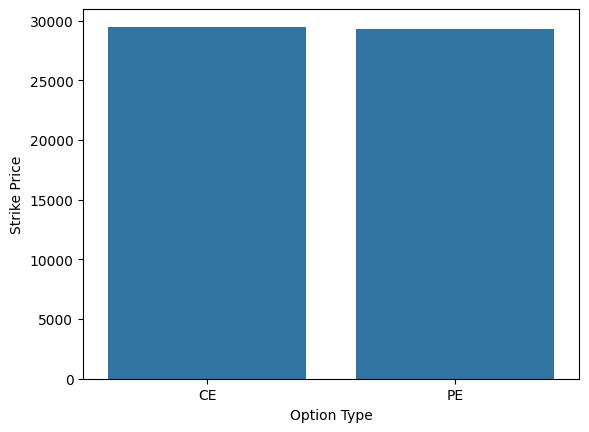

In [75]:
for feature in categorical_feature:
#     sns.barplot(df[feature],df['Strike Price'])
    sns.barplot(x=data[feature],y=data['Strike Price'],data=df,estimator=np.median,errorbar=('ci', False))

In [76]:
numerical_feature=[feature for feature in df if df[feature].dtype !='O']
print(f'{len(numerical_feature)} numerical Features are present\n{numerical_feature}')

7 numerical Features are present
['Strike Price', 'Open', 'Prev_BN_CP', 'BankNifty_OP', 'Change_In_BN', 'Prev_Close', 'Dist_frm_expiry']


In [77]:
# There are two types of numerical Features are present, Descrete & Continious

In [78]:
descrete_numerical_feature=[feature for feature in numerical_feature if len(df[feature].unique()) < 25]
len(descrete_numerical_feature)
# There is no descrete numerical Feature is present, Means all of them are continious numerical featuresabs
df[numerical_feature].dtypes

Strike Price         int64
Open               float64
Prev_BN_CP         float64
BankNifty_OP       float64
Change_In_BN       float64
Prev_Close         float64
Dist_frm_expiry      int64
dtype: object

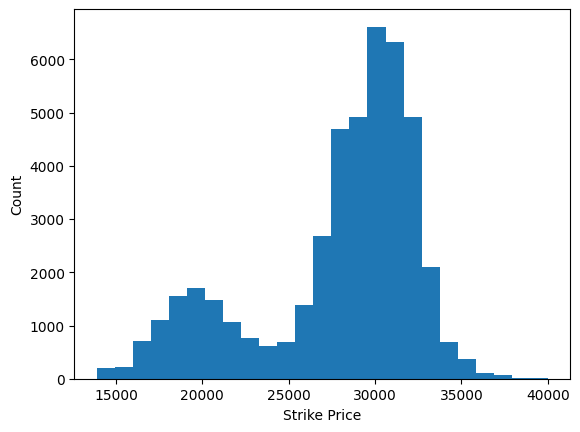

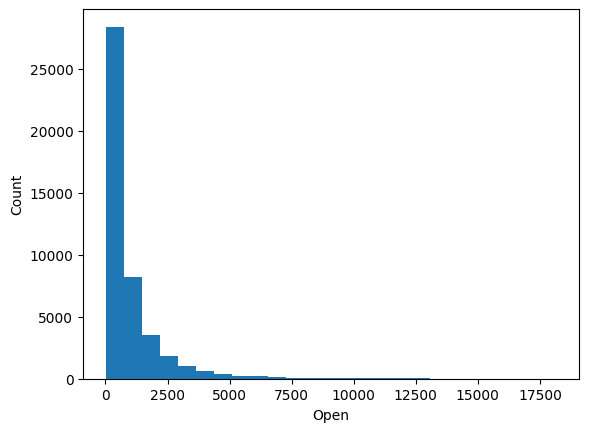

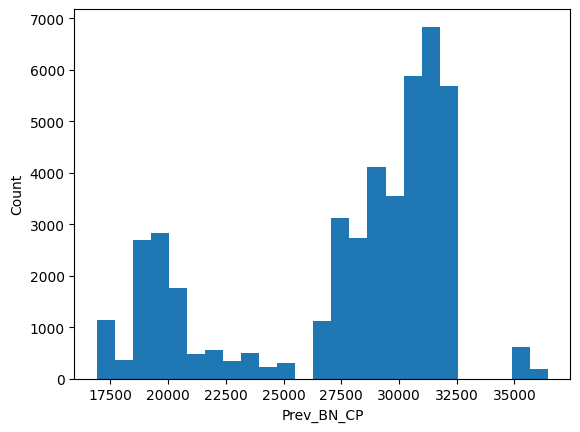

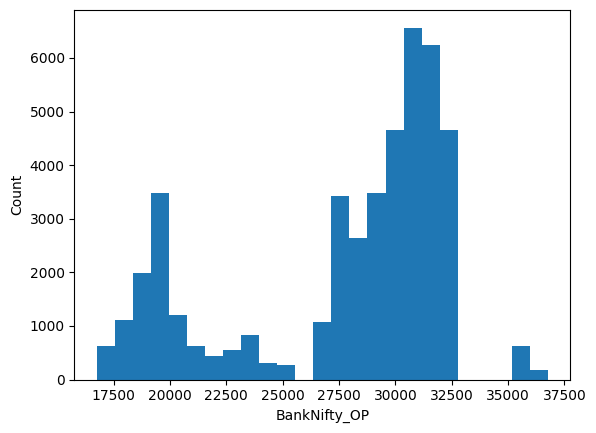

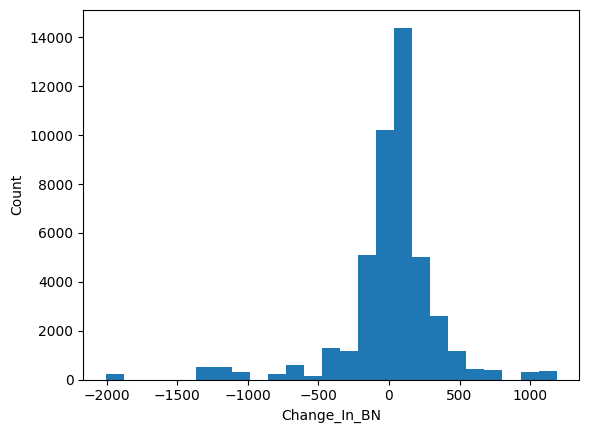

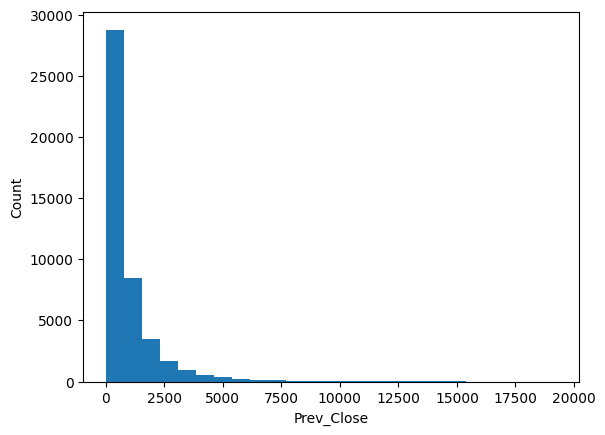

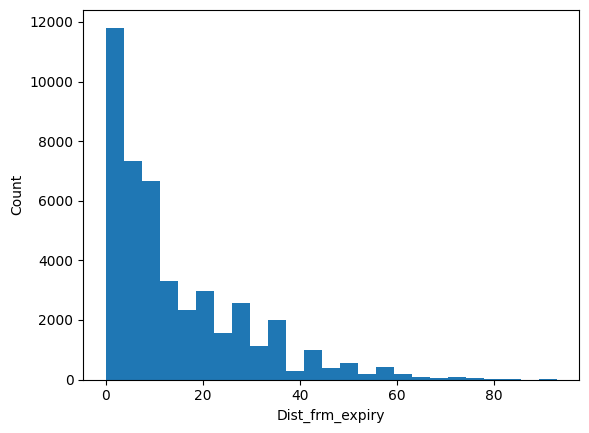

In [79]:
# Analysing the numerical Features
for feature in numerical_feature:
    plt.hist(df[feature],bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

In [80]:
# As we see, Data is following gaussina  distribution, which has a bell curve...

In [81]:
# Exploratory Data Analysis is Completed, Now in second part we will perform feature engineering

# Feature Engineering

In [82]:
df.head()

,Option Type,Strike Price,Open,Prev_BN_CP,BankNifty_OP,Change_In_BN,Prev_Close,Dist_frm_expiry
0,CE,26400,1177.35,27554.05,27618.1,64.05,1125.00,1
1,CE,27300,329.60,27554.05,27618.1,64.05,291.95,1
2,CE,27400,234.90,27554.05,27618.1,64.05,212.85,1
3,CE,27500,164.00,27554.05,27618.1,64.05,146.50,1
4,CE,27600,123.80,27554.05,27618.1,64.05,93.85,1


In [83]:
# Lable Encoding-----
# Lable Encodes mapped the integer value to category of option, Ex=0 : CE & 1: PE
from sklearn.preprocessing import LabelEncoder
for label in categorical_feature:
    le = LabelEncoder()   
    df[label]= le.fit_transform(df[label])
df.head()

,Option Type,Strike Price,Open,Prev_BN_CP,BankNifty_OP,Change_In_BN,Prev_Close,Dist_frm_expiry
0,0,26400,1177.35,27554.05,27618.1,64.05,1125.00,1
1,0,27300,329.60,27554.05,27618.1,64.05,291.95,1
2,0,27400,234.90,27554.05,27618.1,64.05,212.85,1
3,0,27500,164.00,27554.05,27618.1,64.05,146.50,1
4,0,27600,123.80,27554.05,27618.1,64.05,93.85,1


In [84]:
df.corr()
# Getting corelation between Features

,Option Type,Strike Price,Open,Prev_BN_CP,BankNifty_OP,Change_In_BN,Prev_Close,Dist_frm_expiry
Option Type,1.000000,-0.032157,0.053802,-0.006343,-0.006984,-0.009047,0.044159,-0.007198
Strike Price,-0.032157,1.000000,-0.050135,0.892948,0.887969,0.004137,-0.056227,0.120674
Open,0.053802,-0.050135,1.000000,-0.141722,-0.148702,-0.104227,0.981366,0.024499
Prev_BN_CP,-0.006343,0.892948,-0.141722,1.000000,0.997186,0.041456,-0.143257,0.127933
BankNifty_OP,-0.006984,0.887969,-0.148702,0.997186,1.000000,0.116236,-0.147233,0.128937
Change_In_BN,-0.009047,0.004137,-0.104227,0.041456,0.116236,1.000000,-0.064295,0.023479
Prev_Close,0.044159,-0.056227,0.981366,-0.143257,-0.147233,-0.064295,1.000000,0.027477
Dist_frm_expiry,-0.007198,0.120674,0.024499,0.127933,0.128937,0.023479,0.027477,1.000000


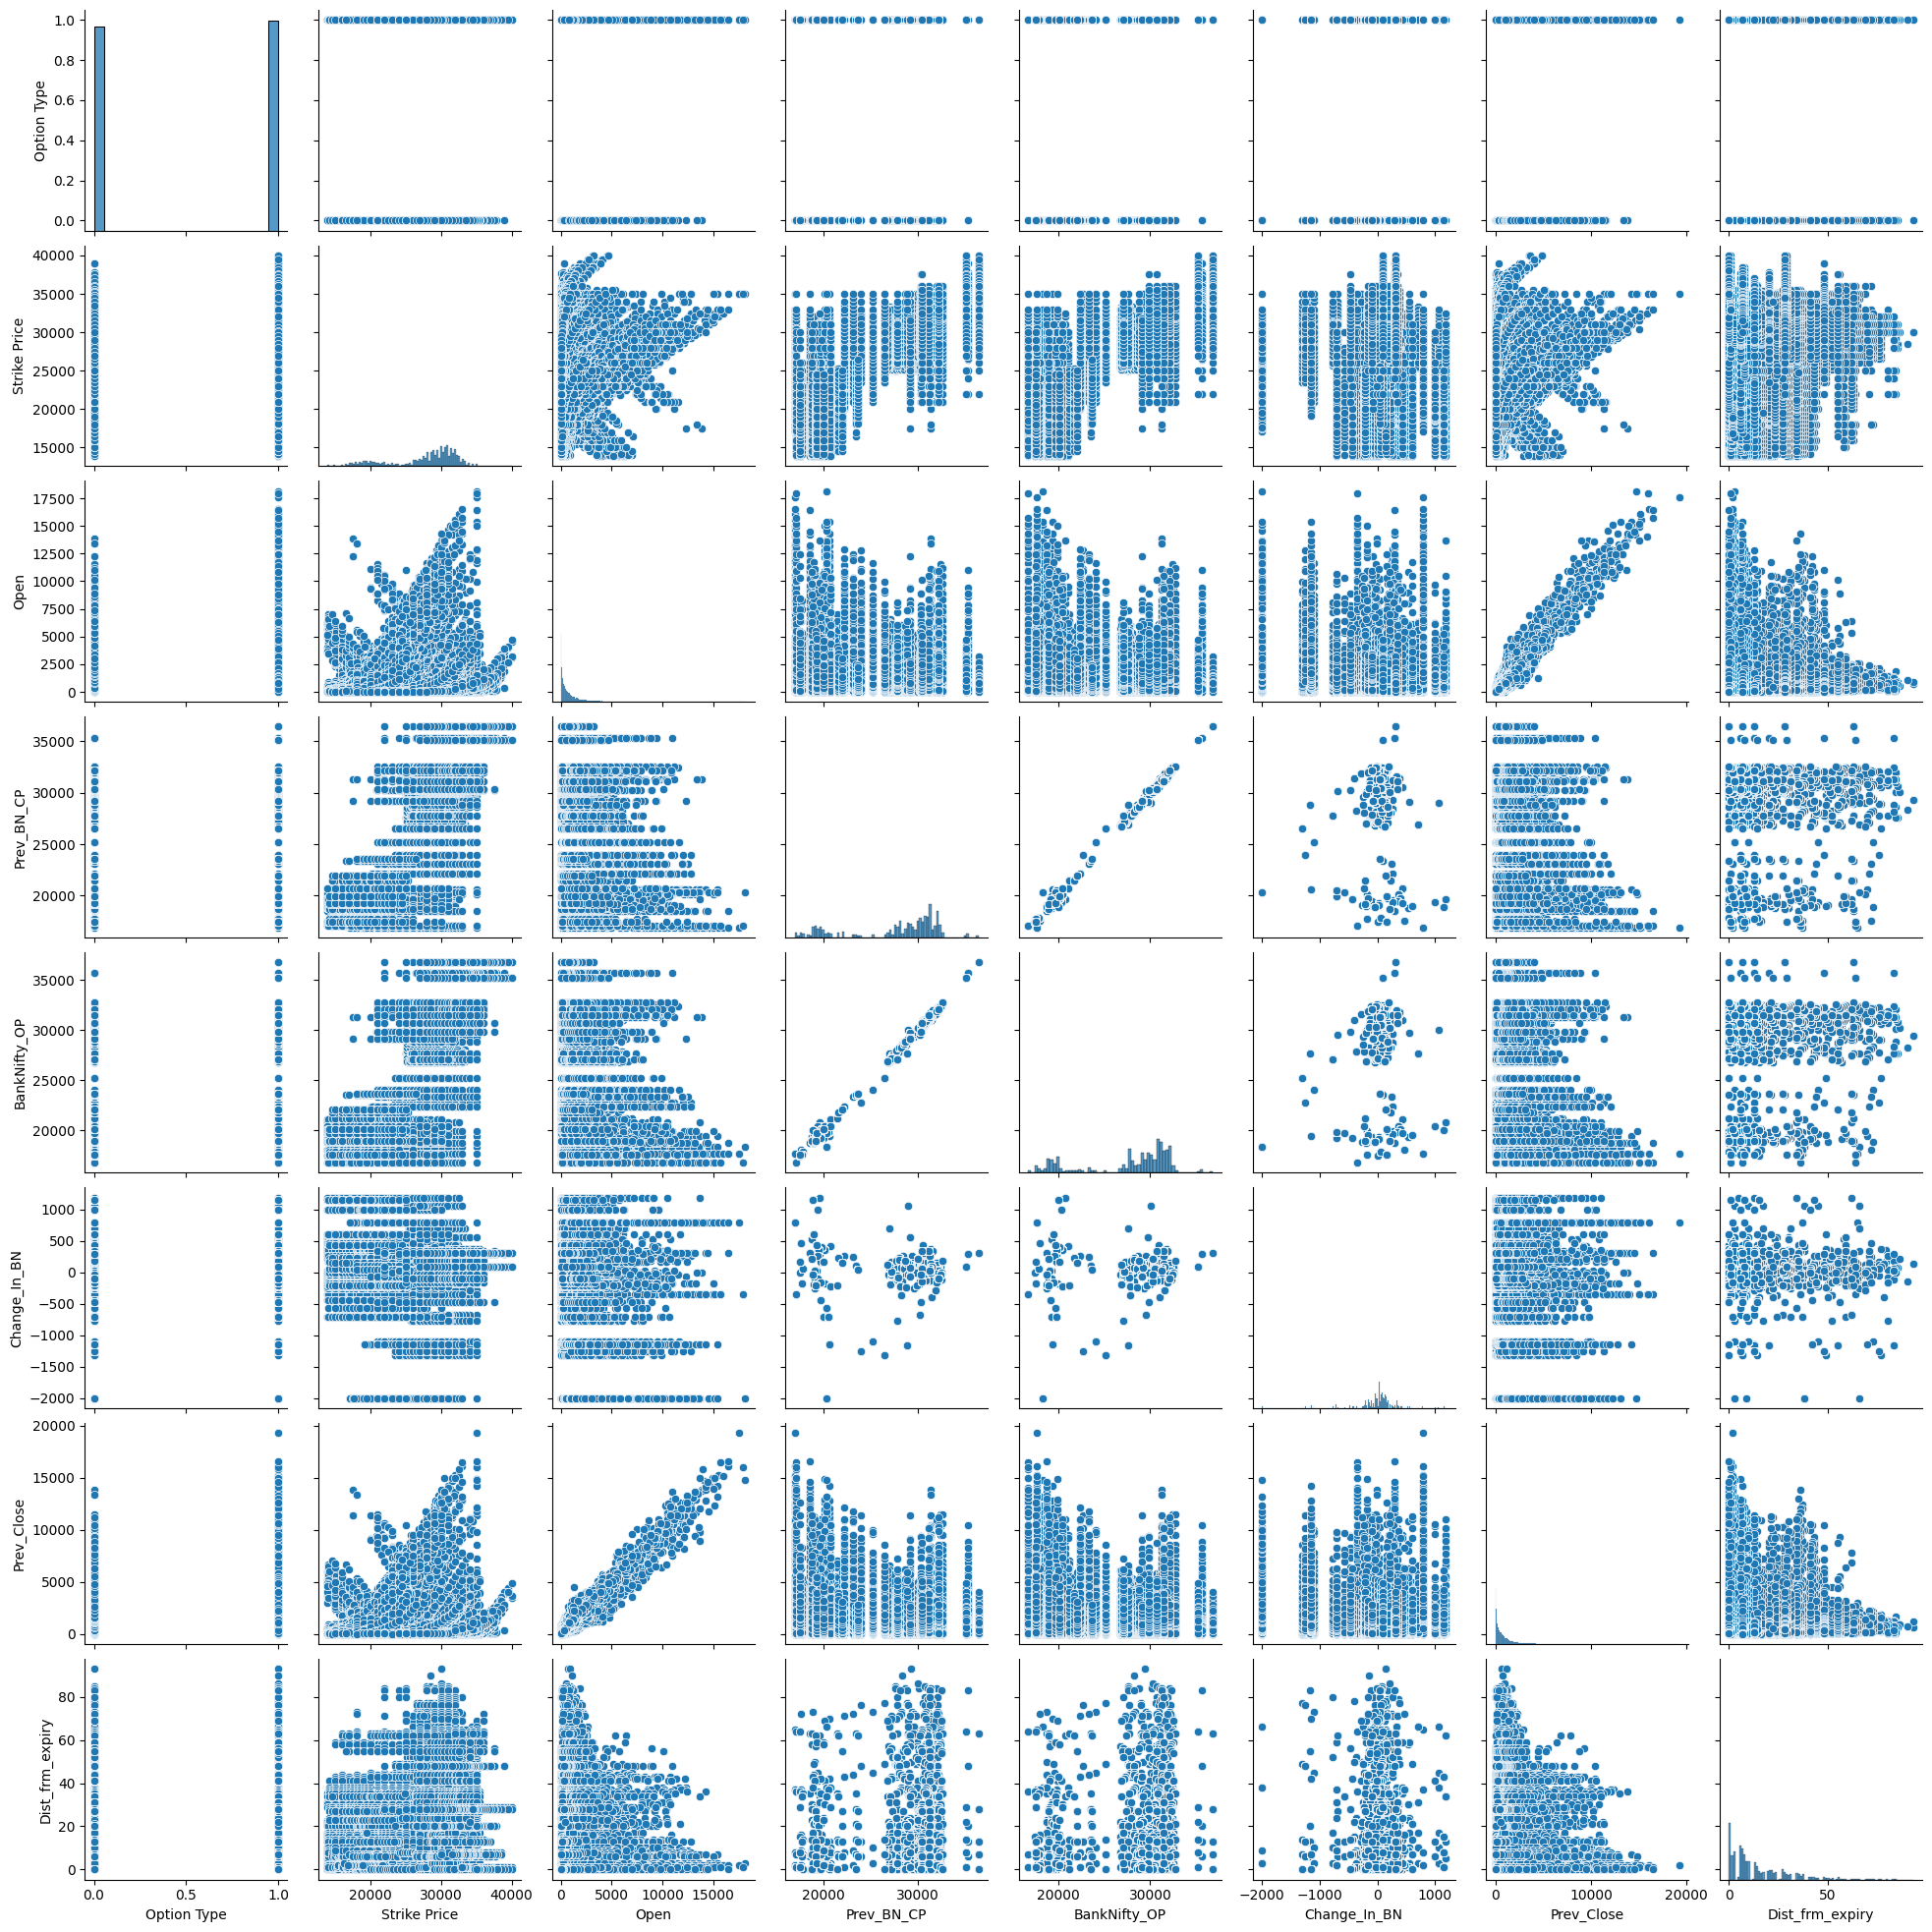

In [85]:
sns.pairplot(df)
#Graphical Representation of Correlation between all the features

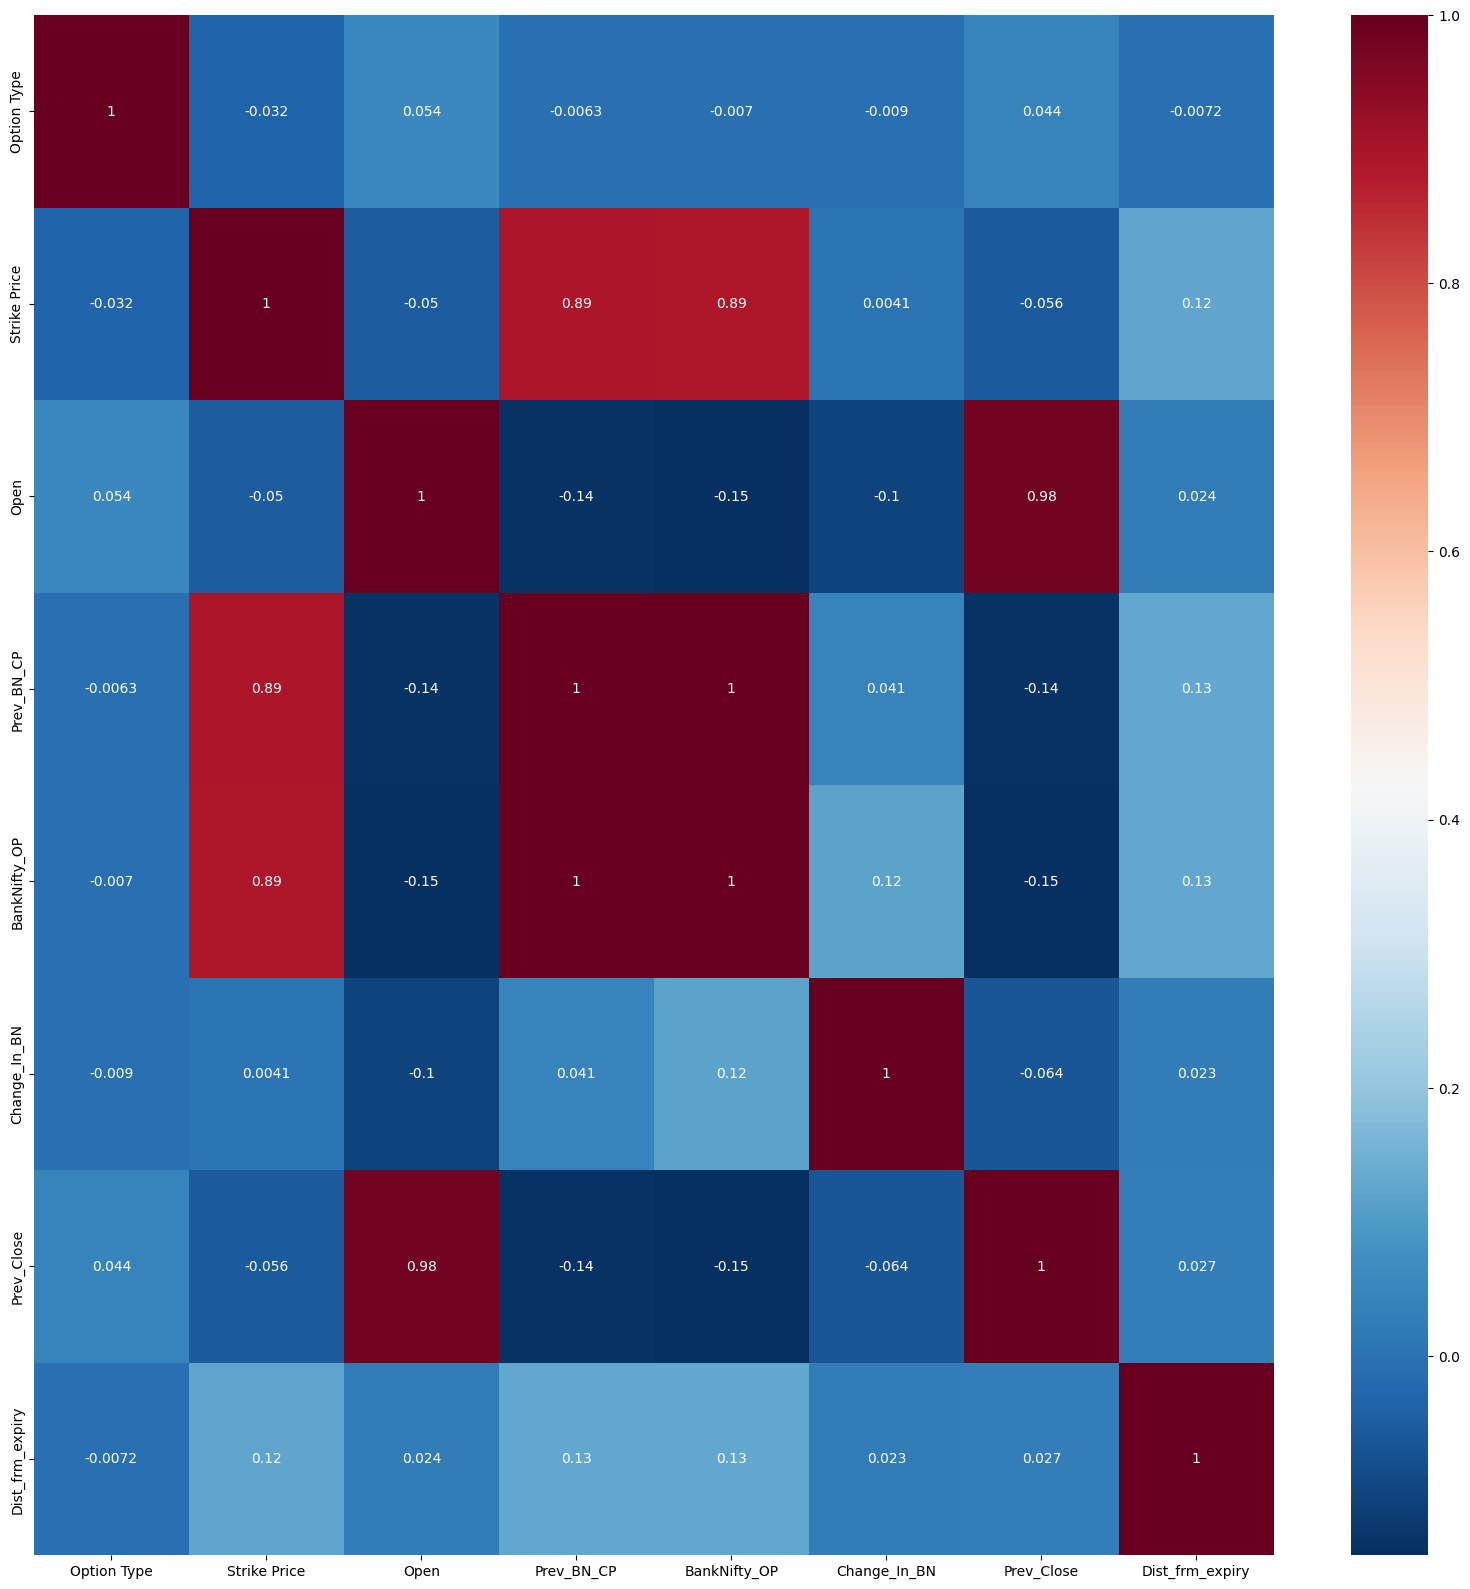

In [86]:
#Represent in the form of HeatMap
corrmat=df.corr()
top_corr_feature=corrmat.index
plt.figure(figsize=(20,20))
#Plotting Heatmap
x=sns.heatmap(df[top_corr_feature].corr(),annot=True,cmap="RdBu_r")

In [87]:
df.head()

,Option Type,Strike Price,Open,Prev_BN_CP,BankNifty_OP,Change_In_BN,Prev_Close,Dist_frm_expiry
0,0,26400,1177.35,27554.05,27618.1,64.05,1125.00,1
1,0,27300,329.60,27554.05,27618.1,64.05,291.95,1
2,0,27400,234.90,27554.05,27618.1,64.05,212.85,1
3,0,27500,164.00,27554.05,27618.1,64.05,146.50,1
4,0,27600,123.80,27554.05,27618.1,64.05,93.85,1


In [88]:
# As we are going to use RandomForesetRegressor, So Feature scaling is not required, 

# Feature Selection

We will check importance of features and after that with the help of Lasso regression we will remove features which does not have any impact on our output

In [89]:
#Independetn & dependent Features
X=df.drop('Open',axis=1)
y=df['Open']

In [90]:
X.shape,y.shape

((45012, 7), (45012,))

In [91]:
#Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [92]:
model.feature_importances_

array([0.01181933, 0.01138036, 0.00587391, 0.00502637, 0.01773712,
       0.94569701, 0.0024659 ])

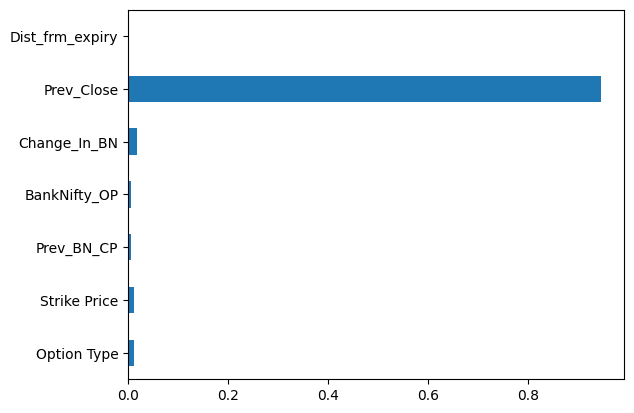

In [93]:
#Graphical representation
imp_feature=pd.Series(model.feature_importances_,index=X.columns)
imp_feature.plot(kind='barh')
plt.show()
# Most important feature is prev_close, It is correct dataset.

In [94]:
# Using Train test Split to split the data for testing & training

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=20)

In [96]:
from sklearn.ensemble import RandomForestRegressor

In [97]:
rf=RandomForestRegressor(n_estimators=10)
#No Hyperparameter tunning is used for this model, as our o/p is mostly depend on prev_close, will implement it in another project

In [102]:
rf.fit(X_train,y_train)
#Training Model

RandomForestRegressor(n_estimators=10)

In [103]:
rf.score(X_test,y_test)
# it shows 98.15 % accuracy, will check with confission matrix as well

0.9817392034048357

In [104]:
rf.predict([[0,35400,35419,35754,334,388,1]])
#Live Testing Data

/Users/akshay.soni/Documents/Personal/Option_Price_Prediction_ML/.venv/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([505.355])

In [105]:
from sklearn.model_selection import cross_val_score
cv=cross_val_score(rf,X_train,y_train,cv=10,n_jobs=-1)
cv.mean()

np.float64(0.9815313779419521)

In [106]:
# By K-Fold validation, we are getting on avg accuracy of 98.14%

In [107]:
y_pred=rf.predict(X_test)

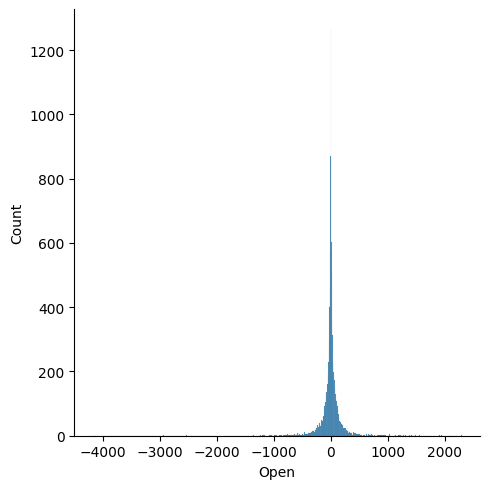

In [108]:
sns.displot(y_pred-y_test)

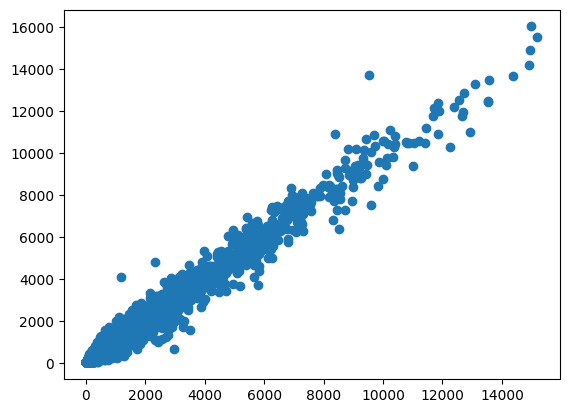

In [109]:
plt.scatter(y_pred,y_test)
#Linearly avalible... it means our prediction is good.

In [110]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)
#Getting 98.12 with KNN algorithm

0.9812256472836162

In [114]:
import pickle
#open a file, where we want to store data
file = open('option_predictor_model.pkl','wb')
#dump information to that file
pickle.dump(rf,file)

In [113]:
#---------------------------The End----------------------------------